# Regression Problems

In [1]:
#import the pandas
import pandas as pd

In [2]:
data = pd.read_csv('data/Advertising.csv')
#display first 5 rows
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 5)

In [11]:
import seaborn as sns
%matplotlib inline

/home/bhuvi/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


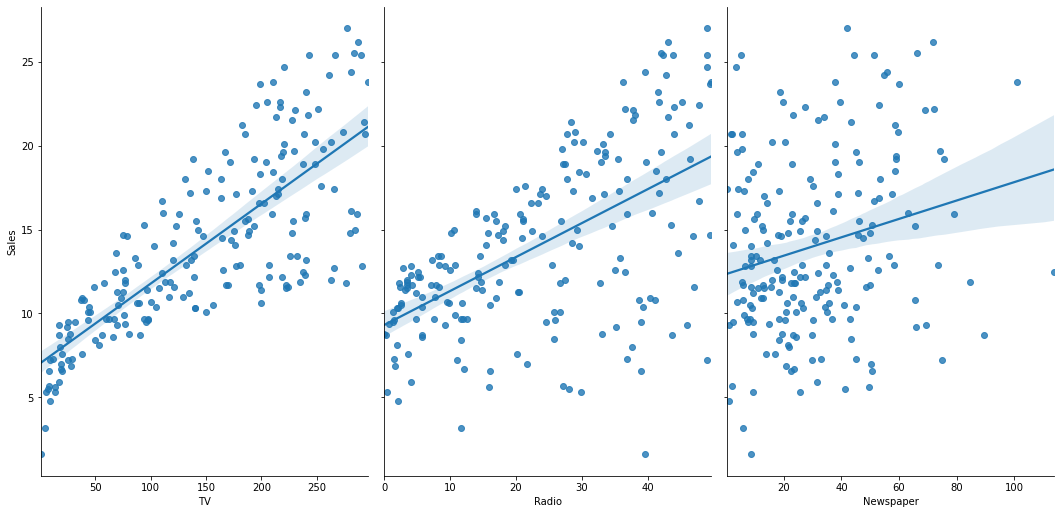

In [25]:
sns.pairplot(data,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",size=7,aspect=0.7,kind='reg')

In [13]:
feature_cols=["TV","Radio","Newspaper"]
X=data[["TV","Radio","Newspaper"]]
print(type(X))
print(X.shape)
X.head()

<class 'pandas.core.frame.DataFrame'>
(200, 3)


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
y=data["Sales"]
print(type(y))
print(y.shape)
y.head()

<class 'pandas.core.series.Series'>
(200,)


0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Split the Train and Test Data

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [16]:
X_train.shape

(150, 3)

In [17]:
X_test.shape

(50, 3)

In [18]:
y_train.shape

(150,)

In [19]:
y_test.shape

(50,)

# Linear Regression in Scikit-Learn

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [21]:
linreg.intercept_

2.8769666223179335

In [22]:
linreg.coef_

array([0.04656457, 0.17915812, 0.00345046])

In [26]:
zip(feature_cols,linreg.coef_)

# Making Predictions

In [28]:
y_pred=linreg.predict(X_test)

# Model Evaluate metrics for Regression

In [30]:
#define true and predicted response values
true=[100,50,30,20]
pred=[0,50,50,30]

# MAE

In [36]:
#calculate MAE(mean absolute error) by hand
print((100+0+20+10)/4)

32.5


In [33]:
from sklearn import metrics
metrics.mean_absolute_error(true,pred)

32.5

# MSE

In [38]:
#calculate MSE(mean squared error) by hand
print((100**2+0**2+20**2+10**2)/4)

2625.0


In [39]:
metrics.mean_squared_error(true,pred)

2625.0

# RMSE

In [42]:
#calculate RMSE(Root Mean Squared Root) by hand
import numpy as np
print(np.sqrt((100**2+0**2+20**2+10**2)/4.))

51.234753829797995


In [45]:
np.sqrt(metrics.mean_squared_error(true,pred))

51.234753829797995

# Compare the RMSE for our Sales Predictions

In [46]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.4046514230328955

# Feature Selection

Remove Newspaper

In [62]:
import pandas as pd
data=pd.read_csv('data/Advertising.csv')

X=data[["TV","Radio"]]
y=data.Sales

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.3879034699382888

Remove TV

In [63]:
import pandas as pd
data=pd.read_csv('data/Advertising.csv')

X=data[["Newspaper","Radio"]]
y=data.Sales

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

3.7486974974677265

Remove Radio

In [65]:
import pandas as pd
data=pd.read_csv('data/Advertising.csv')

X=data[["TV","Newspaper"]]
y=data.Sales

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

3.352056334433862

 Lower the RMSE ,better the Model
 
 Therefore, TV and Radio are the Best combinations for the 
 Linear Regression Model